
This is an exercise to apply the concepts of data encoding and data scaling

### IMPORT LIB

In [1]:
import pandas as pd
import datetime
import calendar
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import load,dump
import warnings

warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (20, 10)

### READ DATA

This data contains the history of the results of the participants who applied for the LPDP scholarship. With this data, we hope that we can predict whether someone will succeed in getting a scholarship based on their test results.

In [2]:
df = pd.read_csv('Hasil Tes SBK LPDP Gelombang I - 2021 (Responses) - Form Responses 1.csv',skipinitialspace = True)
df.head()


,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,6/24/2021 15:54:15,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,6/24/2021 15:54:22,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,6/24/2021 15:54:54,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,6/24/2021 15:56:06,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,6/24/2021 15:56:28,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham


###  DATA CLEANING

In [3]:
#cek kosong
for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> Timestamp, Missing: 0 (0.0%)
> Jenis Beasiswa , Missing: 0 (0.0%)
> Tingkat Pendidikan yang Dituju, Missing: 0 (0.0%)
> Negara Tujuan Kuliah, Missing: 0 (0.0%)
> Bidang Studi yang dipilih saat mendaftar, Missing: 0 (0.0%)
> Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP , Missing: 0 (0.0%)
> Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?, Missing: 0 (0.0%)
> Jumlah Jawaban Benar pada Tes Penalaran Verbal, Missing: 0 (0.0%)
> Jumlah Jawaban Benar pada Tes Kuantitatif, Missing: 0 (0.0%)
> Jumlah Jawaban Benar pada Tes Pemecahan Masalah, Missing: 0 (0.0%)
> [optional] Kampus/universitas tujuan saat ini (pilihan 1), Missing: 91 (19.3%)


In [3]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(471, 11)
(380, 11)


In [4]:
#cek duplikat
duplicatedDataCount = df.duplicated().sum()
print(f'Jumlah data yang terduplikasi adalah sebanyak = {duplicatedDataCount}')

Jumlah data yang terduplikasi adalah sebanyak = 0


In [5]:
timestamp = df["Timestamp"]
newTimeStamp = []
for i in timestamp:
	datem = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M:%S")
	newTimeStamp.append(str(calendar.month_name[datem.month]+" "+str(datem.year)).strip())
df["Timestamp"] = newTimeStamp
df.head()

,Timestamp,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,June 2021,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,June 2021,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,June 2021,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,June 2021,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,June 2021,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham


In [6]:
#membenarkan typo pada kolom tujuan
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["ui","Universitas Indonesia","UNIVERSITAS INDONESIA","universitas indonesia","Ui"], "UI")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Universitas Negeri Yogyakarta","UNY")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Itb","Institut Teknologi Bandung"], "ITB")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Ugm","ugm","Universitas Gadjah Mada"], "UGM")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["University of Manchester","The University of Manchester"], "UOM")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["unpad","Universitas Padjadjaran","Unpad"], "UNPAD")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["university of birmingham","University of Birmingham","Universitas Padjadjaran"], "UOB")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["wur","Wageningen University and Research"], "WUR")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Institut Pertanian Bogor", "IPB")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Universitas Airlangga", "UNAIR")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["TU DELFT","Tu Delft"], "Tu delft")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Edinburgh","University of Edinburgh"], "Edin")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Universitas Pendidikan Indonesia", "UPI")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Universitas Negeri Malang", "UM")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("King's College London", "KCL")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("ucl", "UCL")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Imperial College London", "ICL")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace("Nus", "NUS")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Univ of Leeds","University of Leeds"], "UL")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["University of Michigan","Uni of Michigan"], "MICH")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Unhas","Universitas hasanuddin"], "UNHAS")
df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"] = df["[optional] Kampus/universitas tujuan saat ini (pilihan 1)"].replace(["Univ Pendidikan Indonesia/ UPI","Upi","UPI BANDUNG"], "UPI")

In [7]:
for i in df.columns:
    print(df[i].unique())

['June 2021' 'July 2021' 'August 2021' 'September 2021' 'October 2021'
 'December 2021' 'April 2022' 'September 2022']
['Targeted' 'Reguler' 'Afirmasi']
['S2' 'S3']
['Dalam negeri' 'Luar Negeri']
['TRP' 'ENE' 'ELE' 'LIN' 'Dev' 'HUM' 'AFR' 'BUS' 'WAT' 'MAR' 'SOS' 'EDU'
 'ICT' 'LAW' 'SGY' 'ACF' 'IPA' 'PHA' 'FOR' 'COM' 'DEF' 'PUB' 'DEV' 'SOs'
 'ATM' 'ENG' '-' 'CBS' 'CHE' 'KES' 'ECT' 'AER' 'STA' 'BIO' 'POL' 'Bus' 'M'
 'Afr' 'SOC' 'MED' 'CIV' 'ARC' 'MET' 'ECO' 'Bio' 'TEK' 'ENV' 'Tra' 'ART'
 'HOS' 'ENT' 'Civ' 'TRA' 'GEO' 'LNY' 'BK' 'PSY' 'FOO' 'ETC' 'PHY' 'INS'
 'ACC' 'OCE' 'MAT' 'For' 'BuS' 'EAM' 'PTK' 'CE' 'EDu' '000' 'arc' 'Psi'
 'TP' 'TFM' 'AGB' 'Law' '718' 'OTH' 'FIN' 'Edu']
['Tidak' 'Ya, dengan Loa']
['Ya' 'Tidak']
[10 17 16 15 13 20 14 12 18 19 11  9  7  8  6 22  0 23]
[12 22 18  9 11 16 15 14 13  8 21 17 20 19  7 23 10  6 24  0  2  5 25]
[ 6  8  7  4  5  9  3  2 12 10  1  0]
['UI' 'UCL' 'KTH Sweden' 'UGM' 'UOB' 'KU leuven' 'Uni of Reading'
 'University of Auckland' 'IHE Delft' 'MICH'

In [8]:
df.dtypes

Timestamp                                                                               object
Jenis Beasiswa                                                                          object
Tingkat Pendidikan yang Dituju                                                          object
Negara Tujuan Kuliah                                                                    object
Bidang Studi yang dipilih saat mendaftar                                                object
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                  object
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?    object
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           int64
Jumlah Jawaban Benar pada Tes Kuantitatif                                                int64
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          int64
[optional] Kampus/universitas tujuan saat ini (pil

# NUMERICAL DATA VISUALIZATION

In [9]:
df.describe()

,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah
count,380.000000,380.000000,380.000000
mean,15.042105,14.413158,6.134211
std,2.796212,4.308712,1.827780
min,0.000000,0.000000,0.000000
25%,13.000000,12.000000,5.000000
50%,15.000000,15.000000,6.000000
75%,17.000000,17.000000,7.000000
max,23.000000,25.000000,12.000000


In [10]:
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]

numericalDataX = X.select_dtypes(include=['int64', 'float64']).columns
categoricalDataX = X.select_dtypes(include=['object', 'bool']).columns
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,numericalDataX], y, random_state=42)
noTransformation = [X_train,X_test, y_train, y_test]
dump(noTransformation,open('no_transformation.pkl','wb'))

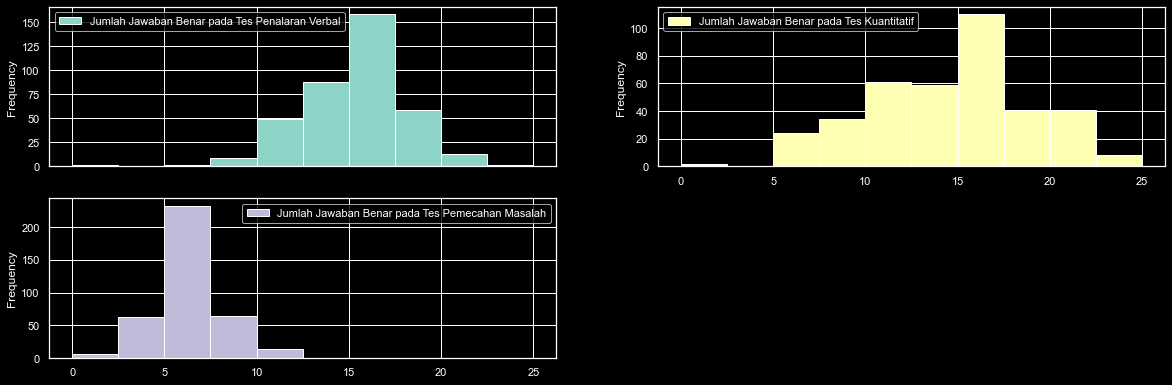

In [12]:
df.loc[:,numericalDataX].plot.hist(subplots=True, legend=True, layout=(3,2))
plt.show()

### ENCODING + SCALING

#### OHE + ROBUST

In [13]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop="first",handle_unknown='ignore'),categoricalDataX),
    ('tnf2',RobustScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ohe_and_robust.pkl','wb'))


#### OHE + MINMAX

In [14]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop="first",handle_unknown='ignore'),categoricalDataX),
    ('tnf2',MinMaxScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ohe_and__minmax.pkl','wb'))

#### OHE + STANDARD

In [15]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop="first",handle_unknown='ignore'),categoricalDataX),
    ('tnf2',StandardScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ohe_and__standard.pkl','wb'))

#### ORD + ROBUST

In [16]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OrdinalEncoder(),categoricalDataX),
    ('tnf2',RobustScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ord_and__robust.pkl','wb'))

#### ORD + MINMAX

In [17]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OrdinalEncoder(),categoricalDataX),
    ('tnf2',MinMaxScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ord_and__mimax.pkl','wb'))

### ORD + STANDARD

In [18]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',OrdinalEncoder(),categoricalDataX),
    ('tnf2',StandardScaler(),numericalDataX)
])
X = df.drop(["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1)
y = df["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"]
X_cols = X.columns
X = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
modelDict = {}
for model,names in zip(models,modelNames):
    model.fit(X_train,y_train)
    modelDict[names] = model
modelDict["data"] = [X_train, X_test, y_train, y_test]
dump(modelDict,open('models_ord_and__standard.pkl','wb'))

### FIND BEST MODEL AND ACCURACY COMPARISON

In [21]:
yestransform1 = load(open('models_ohe_and_robust.pkl','rb'))
X_train,X_test,y_train,y_test = yestransform1["data"]

yestransform2 = load(open('models_ohe_and__minmax.pkl','rb'))
X_train1,X_test1,y_train1,y_test1 = yestransform2["data"]

yestransform3 = load(open('models_ohe_and__standard.pkl','rb'))
X_train11,X_test11,y_train11,y_test11 = yestransform3["data"]

yestransform4 = load(open('models_ord_and__robust.pkl','rb'))
X_train12,X_test12,y_train12,y_test12 = yestransform4["data"]

yestransform5 = load(open('models_ord_and__mimax.pkl','rb'))
X_train13,X_test13,y_train13,y_test13 = yestransform5["data"]

yestransform6 = load(open('models_ord_and__standard.pkl','rb'))
X_train14,X_test14,y_train14,y_test14 = yestransform6["data"]

notransform= load(open('no_transformation.pkl','rb'))
X_train2,X_test2,y_train2,y_test2 = notransform

def findAccuracy(a,xtest,ytest):
    accuracyDict = {model_names:0 for model_names in modelNames}
    _max = -1
    bestModelName = ""
    for model_names in modelNames:
        model = a[model_names]
        y_hat = model.predict(xtest)
        acc = round(accuracy_score(ytest,y_hat),4)
        if acc > _max:
            _max = acc
            bestModelName = model_names
        accuracyDict[model_names] = acc
    return accuracyDict,bestModelName

acc_ohe_robust,best_model_ohe_robust = findAccuracy(yestransform1,X_test,y_test)
acc_ohe_minmax,best_model_ohe_minmax = findAccuracy(yestransform2,X_test1,y_test1)
acc_ohe_standard,best_model_ohe_standard = findAccuracy(yestransform3,X_test11,y_test11)
acc_ord_robust,best_model_ord_robust = findAccuracy(yestransform4,X_test12,y_test12)
acc_ord_minmax,best_model_ord_minmax = findAccuracy(yestransform5,X_test13,y_test13)
acc_ord_standard,best_model_ord_standard = findAccuracy(yestransform6,X_test14,y_test14)

modelDict2= {}
for model,names in zip(models,modelNames):
    model.fit(X_train2,y_train2)
    modelDict2[names] = model
acc,best_model = findAccuracy(modelDict2,X_test2,y_test2)

In [34]:
data1 = [(i,acc[i]) for i in acc]
data2 = [(acc_ohe_robust[i]) for i in acc_ohe_robust]
data3 = [(acc_ohe_minmax[i]) for i in acc_ohe_minmax]
data4 = [(acc_ohe_standard[i]) for i in acc_ohe_standard]
data5 = [(acc_ord_robust[i]) for i in acc_ord_robust]
data6 = [(acc_ord_minmax[i]) for i in acc_ord_minmax]
data7 = [(acc_ord_standard[i]) for i in acc_ord_standard]

In [35]:
datas = pd.DataFrame(data=data1,columns=["Model","Accuracy-no-transform"])
datas["Accuracy-OHE+ROBUST"] = data2
datas["Accuracy-OHE+MINMAX"] = data3
datas["Accuracy-OHE+STANDARD"] = data4
datas["Accuracy-ORD+ROBUST"] = data5
datas["Accuracy-ORD+MINMAX"] = data6
datas["Accuracy-ORD+STANDARD"] = data7

### ACCURACY COMPARISON

In [36]:
datas

,Model,Accuracy-no-transform,Accuracy-OHE+ROBUST,Accuracy-OHE+MINMAX,Accuracy-OHE+STANDARD,Accuracy-ORD+ROBUST,Accuracy-ORD+MINMAX,Accuracy-ORD+STANDARD
0,Logistic Regression,0.7368,0.8737,0.8316,0.8737,0.7789,0.8316,0.7789
1,KNN,0.7579,0.8316,0.8000,0.8105,0.6526,0.6842,0.6526
2,SVM,0.7053,0.8737,0.8526,0.8737,0.7474,0.7474,0.7474
3,Naive-Bayes,0.7474,0.4526,0.4526,0.4526,0.8211,0.8211,0.8211
4,Decision Tree,0.6737,0.7895,0.7684,0.7895,0.7474,0.8105,0.7474
5,RandomForest,0.7158,0.8632,0.8632,0.8632,0.8947,0.8947,0.8947
6,Linear Discriminant Analysis,0.7474,0.8526,0.8526,0.8526,0.7789,0.7789,0.7789
7,Ada Boost,0.7684,0.8947,0.8947,0.8947,0.9053,0.9053,0.9053
8,Gradient Boosting,0.6947,0.9368,0.9368,0.9053,0.9053,0.9053,0.9053


We can see that by using an encoding and a scaler on the data, the model can understand the data better and produce more accurate predictions than the raw data. There are several unique things that we can see; for the naive Bayes model, the accuracy decreases with one hot encoding.